In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.


In [3]:
images = np.load('toy_data/dataset_basicshape_v0_image.npy')
X_train = images[:16000]
X_test  = images[16000:20000]
print(X_train.shape, X_test.shape)

(16000, 64, 64) (4000, 64, 64)


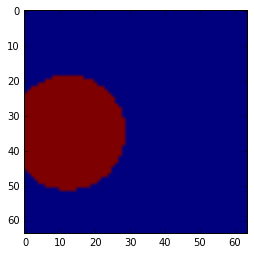

In [4]:
plt.imshow(X_train[0])

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_test = X_test / 255

In [6]:
labels = np.genfromtxt('toy_data/dataset_basicshape_v0_catalog.csv', delimiter=',')
labels = labels[:,[5]].astype(int)
y_train = labels[:16000]
y_test = labels[16000:20000]

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [7]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 28s 2ms/step - loss: 0.6697 - acc: 0.5666 - val_loss: 0.6427 - val_acc: 0.5910
Epoch 2/10
16000/16000 [==============================] - 31s 2ms/step - loss: 0.6082 - acc: 0.6444 - val_loss: 0.5600 - val_acc: 0.7170
Epoch 3/10
16000/16000 [==============================] - 30s 2ms/step - loss: 0.5137 - acc: 0.7377 - val_loss: 0.4899 - val_acc: 0.7190
Epoch 4/10
16000/16000 [==============================] - 29s 2ms/step - loss: 0.4304 - acc: 0.7983 - val_loss: 0.4053 - val_acc: 0.8175
Epoch 5/10
16000/16000 [==============================] - 31s 2ms/step - loss: 0.3712 - acc: 0.8346 - val_loss: 0.3738 - val_acc: 0.8225
Epoch 6/10
16000/16000 [==============================] - 30s 2ms/step - loss: 0.3300 - acc: 0.8577 - val_loss: 0.3348 - val_acc: 0.8330
Epoch 7/10
16000/16000 [==============================] - 31s 2ms/step - loss: 0.2922 - acc: 0.8796 - val_loss: 0.3088 - val_acc: